In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
fake_df = pd.read_csv('data/FakeReviews.csv')

In [14]:
fake_df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [6]:
fake_df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
fake_df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [10]:
fake_df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [12]:
fake_df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [13]:
fake_df.category.value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [16]:
fake_df.drop_duplicates(inplace=True)

In [17]:
fake_df.to_csv("data/FakeReviews.csv", index=False)

In [3]:
real_df = pd.read_csv('data/RealReviews.csv')

In [19]:
real_df.to_parquet("data/RealReviews.parquet", engine="pyarrow", compression="brotli")  # süper sıkıştırma 🚀

In [3]:
real_df = pd.read_parquet('data/RealReviews.parquet', engine="pyarrow")

In [17]:
real_df = real_df.head(40420)

In [4]:
real_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
40415,40416,B001ELL3DM,AMRPS4RP775LF,KitM,1,2,2,1303689600,soggy in milk,If you like soggy cereal then you'll love this...
40416,40417,B001ELL3DM,A1X25R6G0BDQ7W,Nicole,1,3,4,1244332800,Yummy Bran,"Its good for bran, slightly sweet. I usually e..."
40417,40418,B0045JHM8U,ATVSPV7WR1K77,Irene Harris,0,0,5,1206144000,Burgers' Smokehouse Biscuit Ham,I received a ham and 4 packages of the biscuit...
40418,40419,B0044MF2YE,A3TTJ4BLEUPWP8,fidled,0,0,1,1350259200,Sorry,I was disappointed that it was not half as goo...


In [20]:
real_df.drop_duplicates(inplace=True)

In [21]:
real_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
real_df.shape

(568454, 10)

In [11]:
fake_df.shape


(40420, 4)

In [30]:
# Veri setlerini birleştirme ve etiketleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sahte yorumları yükle ve etiketle
fake_df['is_fake'] = 1  # Sahte yorumlar için 1

# Gerçek yorumları yükle ve etiketle
real_df['is_fake'] = 0  # Gerçek yorumlar için 0

# Sahte yorumlar için text sütununu standardize et
fake_df['text'] = fake_df['text_']

# Gerçek yorumlar için text sütununu standardize et
real_df['text'] = real_df['Text']

# Sadece ihtiyacımız olan sütunları seç
fake_selected = fake_df[['text', 'is_fake']]
real_selected = real_df[['text', 'is_fake']]

# Veri setlerini birleştir
combined_df = pd.concat([fake_selected, real_selected], ignore_index=True)

print(f"Toplam veri sayısı: {len(combined_df)}")
print(f"Sahte yorum sayısı: {len(fake_df)}")
print(f"Gerçek yorum sayısı: {len(real_df)}")

Toplam veri sayısı: 80840
Sahte yorum sayısı: 40420
Gerçek yorum sayısı: 40420


In [32]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# NLTK veri setlerini indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Metin temizleme fonksiyonu
def clean_text(text):
    if pd.isna(text):
        return ""

    # Küçük harfe çevir
    text = text.lower()

    # HTML etiketlerini temizle
    text = re.sub(r'<[^>]+>', '', text)

    # URL'leri temizle
    text = re.sub(r'http\S+', '', text)

    # Noktalama işaretlerini temizle
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Sayıları temizle
    text = re.sub(r'\d+', '', text)

    # Fazla boşlukları temizle
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Metin temizleme
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Boş metinleri filtrele
combined_df = combined_df[combined_df['cleaned_text'].str.len() > 0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alpar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alpar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alpar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [33]:
# Stop words ve lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Stop words'leri kaldır ve lemmatize et
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Metin ön işleme
combined_df['processed_text'] = combined_df['cleaned_text'].apply(preprocess_text)

# Metin uzunluğu analizi
combined_df['text_length'] = combined_df['processed_text'].str.len()
combined_df['word_count'] = combined_df['processed_text'].str.split().str.len()

print("Metin ön işleme tamamlandı!")

Metin ön işleme tamamlandı!


In [34]:
combined_df

,text,is_fake,cleaned_text,processed_text,text_length,word_count
0,"Love this! Well made, sturdy, and very comfor...",1,love this well made sturdy and very comfortabl...,love well made sturdy comfortable love itvery ...,52,8
1,"love it, a great upgrade from the original. I...",1,love it a great upgrade from the original ive ...,love great upgrade original ive mine couple year,48,8
2,This pillow saved my back. I love the look and...,1,this pillow saved my back i love the look and ...,pillow saved back love look feel pillow,39,7
3,"Missing information on how to use it, but it i...",1,missing information on how to use it but it is...,missing information use great product price,43,6
4,Very nice set. Good quality. We have had the s...,1,very nice set good quality we have had the set...,nice set good quality set two month,35,7
...,...,...,...,...,...,...
80835,If you like soggy cereal then you'll love this...,0,if you like soggy cereal then youll love this ...,like soggy cereal youll love wanted like high ...,136,23
80836,"Its good for bran, slightly sweet. I usually e...",0,its good for bran slightly sweet i usually eat...,good bran slightly sweet usually eat half serv...,129,20
80837,I received a ham and 4 packages of the biscuit...,0,i received a ham and packages of the biscuit s...,received ham package biscuit sized ham slice c...,245,39
80838,I was disappointed that it was not half as goo...,0,i was disappointed that it was not half as goo...,disappointed half good lawrys meatloaf mix too...,75,10


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textstat import flesch_reading_ease, flesch_kincaid_grade

# Metin özelliklerini çıkar
def extract_text_features(df):
    # Temel özellikler
    df['avg_word_length'] = df['processed_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x else 0)
    df['exclamation_count'] = df['text'].str.count('!')
    df['question_count'] = df['text'].str.count('\?')
    df['capital_count'] = df['text'].str.count('[A-Z]')

    # Okunabilirlik skorları
    df['flesch_score'] = df['text'].apply(lambda x: flesch_reading_ease(x) if x else 0)
    df['flesch_kincaid'] = df['text'].apply(lambda x: flesch_kincaid_grade(x) if x else 0)

    return df

# Özellik çıkarımı
combined_df = extract_text_features(combined_df)

# TF-IDF Vektörleştirme
tfidf = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.8, ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(combined_df['processed_text'])

print("Özellik çıkarımı tamamlandı!")

<>:9: SyntaxWarning: invalid escape sequence '\?'
<>:9: SyntaxWarning: invalid escape sequence '\?'
C:\Users\alpar\AppData\Local\Temp\ipykernel_33812\431186191.py:9: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['text'].str.count('\?')


Özellik çıkarımı tamamlandı!


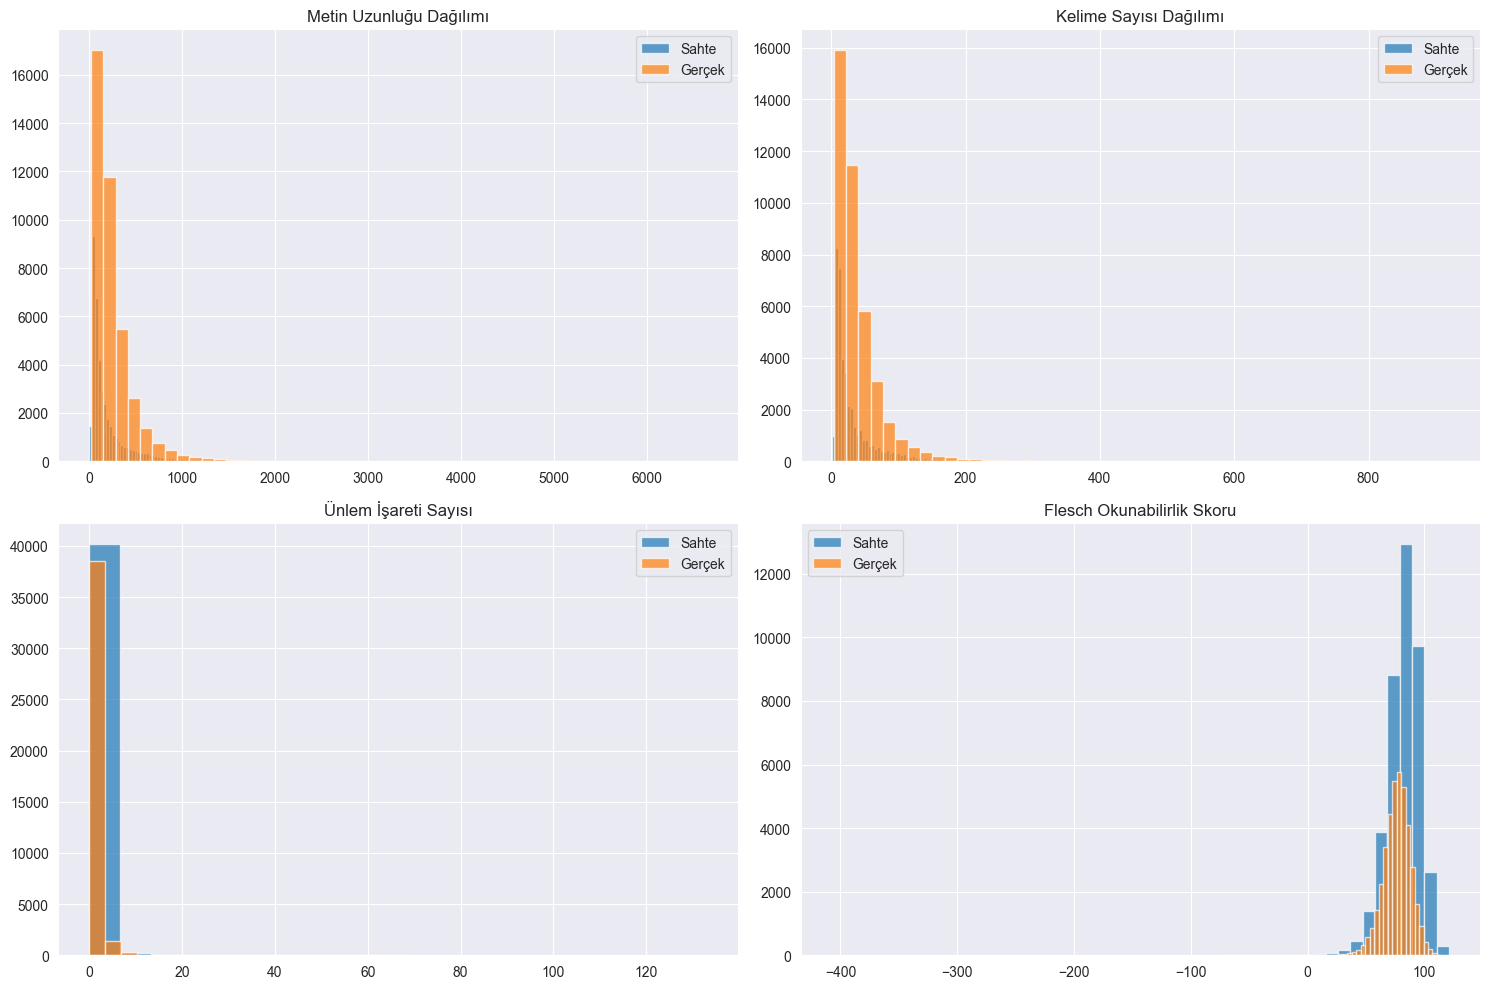

In [37]:
# Sahte ve gerçek yorumları karşılaştır
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Metin uzunluğu dağılımı
axes[0, 0].hist(combined_df[combined_df['is_fake'] == 1]['text_length'], alpha=0.7, label='Sahte', bins=50)
axes[0, 0].hist(combined_df[combined_df['is_fake'] == 0]['text_length'], alpha=0.7, label='Gerçek', bins=50)
axes[0, 0].set_title('Metin Uzunluğu Dağılımı')
axes[0, 0].legend()

# Kelime sayısı dağılımı
axes[0, 1].hist(combined_df[combined_df['is_fake'] == 1]['word_count'], alpha=0.7, label='Sahte', bins=50)
axes[0, 1].hist(combined_df[combined_df['is_fake'] == 0]['word_count'], alpha=0.7, label='Gerçek', bins=50)
axes[0, 1].set_title('Kelime Sayısı Dağılımı')
axes[0, 1].legend()

# Ünlem işareti sayısı
axes[1, 0].hist(combined_df[combined_df['is_fake'] == 1]['exclamation_count'], alpha=0.7, label='Sahte', bins=20)
axes[1, 0].hist(combined_df[combined_df['is_fake'] == 0]['exclamation_count'], alpha=0.7, label='Gerçek', bins=20)
axes[1, 0].set_title('Ünlem İşareti Sayısı')
axes[1, 0].legend()

# Flesch okunabilirlik skoru
axes[1, 1].hist(combined_df[combined_df['is_fake'] == 1]['flesch_score'], alpha=0.7, label='Sahte', bins=50)
axes[1, 1].hist(combined_df[combined_df['is_fake'] == 0]['flesch_score'], alpha=0.7, label='Gerçek', bins=50)
axes[1, 1].set_title('Flesch Okunabilirlik Skoru')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8084
           1       0.96      0.96      0.96      8084

    accuracy                           0.96     16168
   macro avg       0.96      0.96      0.96     16168
weighted avg       0.96      0.96      0.96     16168



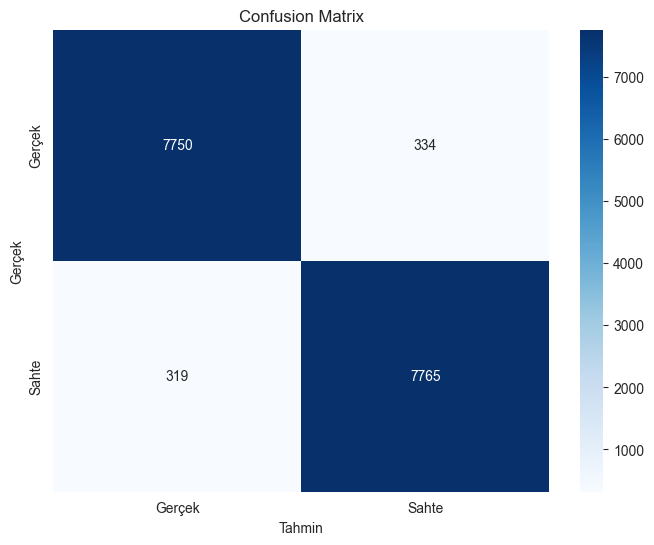

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sp

# Özellik matrisini hazırla
numerical_features = ['text_length', 'word_count', 'avg_word_length',
                     'exclamation_count', 'question_count', 'capital_count',
                     'flesch_score', 'flesch_kincaid']

# Sayısal özellikleri normalize et
scaler = StandardScaler()
numerical_data = scaler.fit_transform(combined_df[numerical_features])

# TF-IDF ve sayısal özellikleri birleştir
X = sp.hstack([tfidf_matrix, numerical_data])
y = combined_df['is_fake']

# Eğitim ve test setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model eğitimi
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Gerçek', 'Sahte'],
            yticklabels=['Gerçek', 'Sahte'])
plt.title('Confusion Matrix')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()

In [40]:
# Yeni yorumları tahmin etmek için fonksiyon
def predict_fake_review(text, model, tfidf, scaler):
    # Metin temizleme
    cleaned = clean_text(text)
    processed = preprocess_text(cleaned)

    # Özellik çıkarımı
    features = {
        'text_length': len(processed),
        'word_count': len(processed.split()),
        'avg_word_length': np.mean([len(word) for word in processed.split()]) if processed else 0,
        'exclamation_count': text.count('!'),
        'question_count': text.count('?'),
        'capital_count': sum(1 for c in text if c.isupper()),
        'flesch_score': flesch_reading_ease(text) if text else 0,
        'flesch_kincaid': flesch_kincaid_grade(text) if text else 0
    }

    # TF-IDF vektörü
    tfidf_vector = tfidf.transform([processed])

    # Sayısal özellikleri normalize et
    numerical_vector = scaler.transform([[features[col] for col in numerical_features]])

    # Özellikleri birleştir
    X_new = sp.hstack([tfidf_vector, numerical_vector])

    # Tahmin yap
    prediction = model.predict(X_new)[0]
    probability = model.predict_proba(X_new)[0]

    return {
        'prediction': 'Sahte' if prediction == 1 else 'Gerçek',
        'fake_probability': probability[1],
        'real_probability': probability[0]
    }

# Örnek tahmin
sample_text = "This product is amazing! Best quality ever! I love it so much!"
result = predict_fake_review(sample_text, model, tfidf, scaler)
print(f"Tahmin: {result['prediction']}")
print(f"Sahte olma olasılığı: {result['fake_probability']:.2f}")
print(f"Gerçek olma olasılığı: {result['real_probability']:.2f}")

Tahmin: Sahte
Sahte olma olasılığı: 0.72
Gerçek olma olasılığı: 0.28


C:\Users\alpar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Dışa Aktarma

In [41]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(model, 'model.pkl')

dump(tfidf, 'tfidf.pkl')

dump(scaler, 'scaler.pkl')

['scaler.pkl']